Section D:- SVR(Support Vector Regression)

Data_Info:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86
DataType:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object
Rows and Columns:
(1338, 7)
Column_Name:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')
Missing_Value:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64
Basic_Calculations:
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960

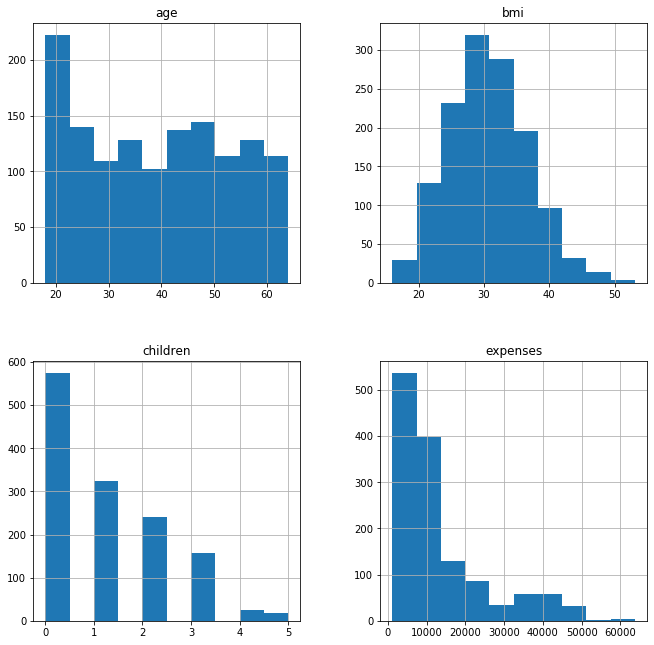

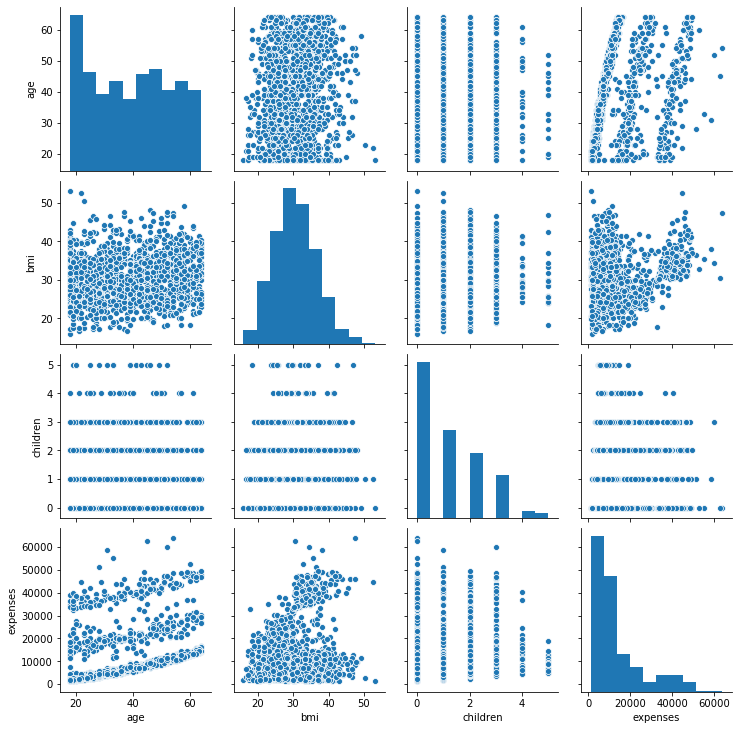

In [2]:
# for better understanding please refer section A, B & C of Regression Result

# For analysis we are going to use Insurance dataset.

# For this insurance dataset we are going to use regression technique

# Our Goal is to create model which helps to predict premium in insurance industries.

# here we are going to build model section wise, in which section A is general which we will use for all technique.

#Section A :-  Data Analysis
# for data analysis we have to import some basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

# importing data set
df = pd.read_csv(r'D:\Learn\Project\Insurance\insurance.csv')

# for imported dataset here we are going to extract some information about data

def Initial_Analysis(data):
    print("Data_Info:")
    print(data.head())
    print("DataType:")
    print(data.dtypes)
    print("Rows and Columns:")
    print(data.shape)
    print("Column_Name:")
    print(data.columns)
    print("Missing_Value:")
    print(data.isnull().sum())
    print("Basic_Calculations:")
    print(data.describe())

#here we are going to call our first function for analysis
Initial_Analysis(df)

# from this step we are going to know that :-
# 1. expenses is our dependent variable
# 2. Except expenses rest all are independent variable
# 3. There are three type of variable int, float, object
# 4. there is no missing value

# we are going visualize data for int and float

df[df.dtypes[(df.dtypes=="float64")|(df.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

# Also with the help of Pair plot we are going to see that how variable relates to each other
sns.pairplot(df)

# Now its time to separate data into Numerical and Categorical variable
# While doing this we are going to preserve original dataset

data = df.copy()

Num_var = data.select_dtypes(include  = np.number).columns
Cat_var = data.select_dtypes(exclude = np.number).columns

for feature in Cat_var:
    print(len(data[feature].unique()))
    
# so now we are performing some operation over Cat_var as we have some categorical features to convert it into Num_var
# for this we will use LableEncoder
# all these operation we apply over data to make model general

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in Cat_var:
    if i != 'region':
        data[i] = LE.fit_transform(data[i])

# here we have converted only those categorgy which have max two categorgy
# for category which have more than two category we will use dummy variable 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder',
                                        OneHotEncoder(drop='first'), [5])],
                                        remainder = 'passthrough')

dataset = ct.fit_transform(data)

In [3]:
# Here we will use SVR , while using svr it is important to scale data on same sacele.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler


In [16]:
def SVR_Regression(df):
    X = df[:, 0:-1]
    y = df[:, -1]
    
    y = y.reshape(len(y), 1) # to sacle data we need array
    sc_X = StandardScaler()
    X = sc_X.fit_transform(X)
    sc_y = StandardScaler()
    y = sc_y.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)
    y_test = np.ravel(y_test)  # to fit model we need 1d 
    y_train = np.ravel(y_train)
        
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    svr_reg = SVR(kernel='rbf')
    svr_reg.fit(X_train, y_train)
    
    print("Intercept_reg : ", model.intercept_)
    print("Intercept_svr : ", svr_reg.intercept_)    

    
    svr_reg_predict = svr_reg.predict(X_test) # if we want to predicted value we will apply inverse _transformation
    reg_predict = model.predict(X_test)      (#svr_reg_predict = sc_y.inverse_transform(svr_reg.predict(X_test)))
    
    print('************************')
    print('r2_score:')
    print("svr_reg_predict : ",r2_score(y_test,svr_reg_predict))
    print("reg_predict  : ",r2_score(y_test,reg_predict))
    print('************************')
    
    print("MAE")
    print("svr : ",mean_absolute_error(y_test,svr_reg_predict))
    print("Reg  : ",mean_absolute_error(y_test,reg_predict))
    print('************************')
    
    print("MSE")
    print("svr : ",mean_squared_error(y_test,svr_reg_predict))
    print("Reg  : ",mean_squared_error(y_test,reg_predict))
    print('************************')
    
    print("RMSE")
    print("svr : ",np.sqrt(mean_squared_error(y_test,svr_reg_predict)))
    print("Reg  : ",np.sqrt(mean_squared_error(y_test,reg_predict)))
    print('************************')
    
    print("MAPE - Mean Absolute Percentage Error")
    y_test, svr_reg_predict = np.array(y_test), np.array(svr_reg_predict)
    print(np.mean(np.abs((y_test - svr_reg_predict) / y_test)) * 100)
    print("Mape - svr:" , np.mean(np.abs((y_test,svr_reg_predict))))
    print("Mape - reg:" ,np.mean(np.abs((y_test,reg_predict))))
    print('************************')

    
    plt.figure(figsize=(10,7))
    plt.title("Actual vs. predicted",fontsize=25)
    plt.xlabel("Actual",fontsize=18)
    plt.ylabel("Reg_Predicted", fontsize=18)
    plt.scatter(x=y_test,y=reg_predict)

    plt.figure(figsize=(10,7))
    plt.title("Actual vs. predicted",fontsize=25)
    plt.xlabel("Actual",fontsize=18)
    plt.ylabel("SVR_Predicted", fontsize=18)
    plt.scatter(x=y_test,y=svr_reg_predict)

Intercept_reg :  0.000136298551285002
Intercept_svr :  [0.37349954]
************************
************************
svr_reg_predict :  0.8891339820781063
reg_predict  :  0.7959101154836331
************************
MAE
Poly :  0.19852494736321805
Reg  :  0.3314606462544308
************************
MSE
Poly :  0.11910610113668074
Reg  :  0.21925880339010106
************************
RMSE
Poly :  0.3451175178641049
Reg  :  0.46825079112597456
************************
MAPE - Mean Absolute Percentage Error
69.73391650791037
Mape - Train: 0.7322204783522923
Mape - Test: 0.731599570869576
************************


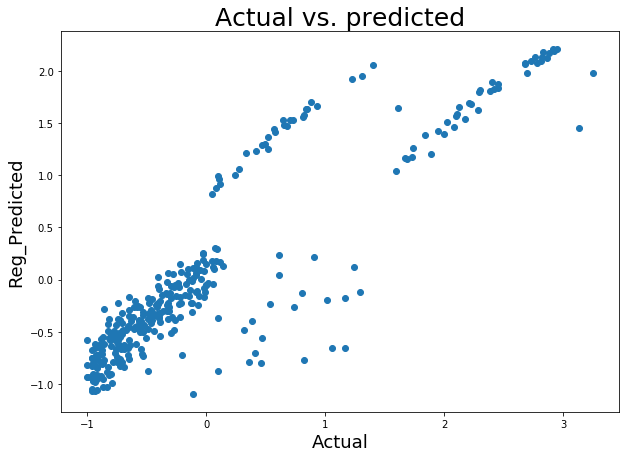

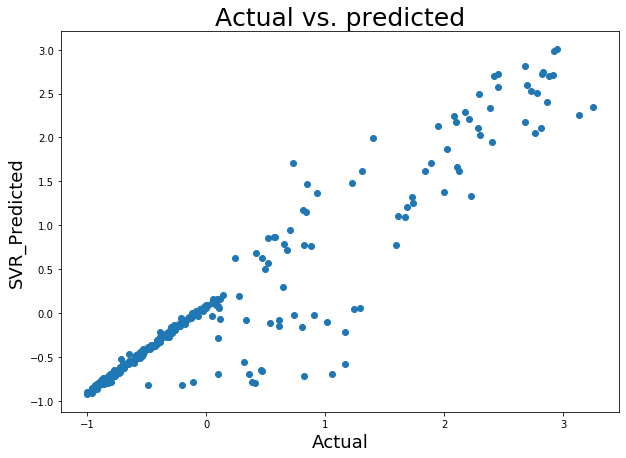

In [17]:
# Fialy here we are going see Magic of SVR
SVR_Regression(dataset)

In [18]:
# Here we saw that result of svr_predict is almost similar to poly_predict
# final we will compare with OLS
import statsmodels.api as sm
result = sm.OLS(endog = dataset[:, -1], exog = dataset[:, 0:-1]).fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1158.
Date:                Sun, 10 May 2020   Prob (F-statistic):                        0.00
Time:                        17:56:26   Log-Likelihood:                         -13618.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1330   BIC:                                  2.729e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
# as of now both Polynomial and SVR is our good model.
# lets wait for next model and some parameter tuning.